In [22]:
import pandas as pd
from IPython.display import display
datos_originales=pd.read_csv("customers-100.csv")
df_filtrando_apellido_contry_phone_1_email=pd.read_csv("customers-100.csv",index_col="Last Name",usecols=["Last Name","Country","Phone 1", "Email"])

datos_originales.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Index              100 non-null    int64 
 1   Customer Id        100 non-null    object
 2   First Name         100 non-null    object
 3   Last Name          100 non-null    object
 4   Company            100 non-null    object
 5   City               100 non-null    object
 6   Country            100 non-null    object
 7   Phone 1            100 non-null    object
 8   Phone 2            100 non-null    object
 9   Email              100 non-null    object
 10  Subscription Date  100 non-null    object
 11  Website            100 non-null    object
dtypes: int64(1), object(11)
memory usage: 9.5+ KB


In [1]:
import pandas as pd
from IPython.display import display
df_celular=pd.read_csv("moviles.csv")
display(df_celular.head())
display(df_celular.shape)
df_celular.info()

,review_id,user_id,app_name,app_category,review_text,review_language,rating,review_date,verified_purchase,device_type,num_helpful_votes,user_age,user_country,user_gender,app_version
0,1,1967825,MX Player,Travel & Local,Qui doloribus consequuntur. Perspiciatis tempo...,no,1.3,2024-10-09 19:26:40,True,Android Tablet,65,14.0,China,Female,1.4
1,2,9242600,Tinder,Navigation,"Great app but too many ads, consider premium v...",ru,1.6,2024-06-21 17:29:40,True,iPad,209,18.0,Germany,Male,8.9
2,3,7636477,Netflix,Dating,The interface could be better but overall good...,es,3.6,2024-10-31 13:47:12,True,iPad,163,67.0,Nigeria,Male,2.8.37.5926
3,4,209031,Venmo,Productivity,"Latest update broke some features, please fix ...",vi,3.8,2025-03-12 06:16:22,True,iOS,664,66.0,India,Female,10.2
4,5,7190293,Google Drive,Education,"Perfect for daily use, highly recommend to eve...",tl,3.2,2024-04-21 03:48:27,True,iPad,1197,40.0,South Korea,Prefer not to say,4.7


(2514, 15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2514 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   review_id          2514 non-null   int64  
 1   user_id            2514 non-null   int64  
 2   app_name           2514 non-null   object 
 3   app_category       2514 non-null   object 
 4   review_text        2455 non-null   object 
 5   review_language    2514 non-null   object 
 6   rating             2477 non-null   float64
 7   review_date        2514 non-null   object 
 8   verified_purchase  2514 non-null   bool   
 9   device_type        2514 non-null   object 
 10  num_helpful_votes  2514 non-null   int64  
 11  user_age           2514 non-null   float64
 12  user_country       2473 non-null   object 
 13  user_gender        1927 non-null   object 
 14  app_version        2484 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(9)
memory usage: 277.6+ KB


In [2]:
#Dia 3 Tema 1: Identificando Valores Faltantes (El Primer Problema)
#La Función Mágica: .isnull() o .isna()
#Paso 1: df.isnull() crea un DataFrame de booleanos.
#Paso 2: .sum() cuenta todos los True en cada columna.
print(df_celular.isnull().sum())

review_id              0
user_id                0
app_name               0
app_category           0
review_text           59
review_language        0
rating                37
review_date            0
verified_purchase      0
device_type            0
num_helpful_votes      0
user_age               0
user_country          41
user_gender          587
app_version           30
dtype: int64


<Axes: title={'center': 'Valores nulos por Columna'}>

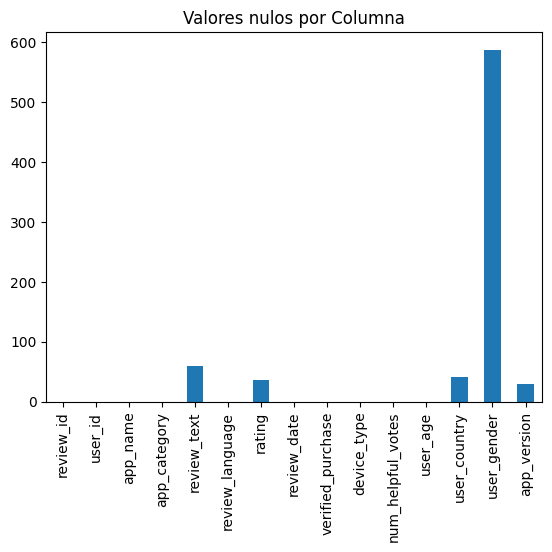

In [3]:
## Contar y graficar los valores nulos
df_celular.isnull().sum().plot(kind="bar",title="Valores nulos por Columna")

In [4]:
#Opción 2: Rellenar los Valores Faltantes (.fillna())
df_celular["user_gender"].fillna("Desconocido",inplace=True)
print(df_celular.isnull().sum())

review_id             0
user_id               0
app_name              0
app_category          0
review_text          59
review_language       0
rating               37
review_date           0
verified_purchase     0
device_type           0
num_helpful_votes     0
user_age              0
user_country         41
user_gender           0
app_version          30
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\75073927.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_celular["user_gender"].fillna("Desconocido",inplace=True)


In [5]:
#El promedio (.mean()) o la mediana (.median()) de la columna:
promedio_rating=df_celular["rating"].mean()
df_celular["rating"].fillna(promedio_rating,inplace=True)

C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\483449646.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_celular["rating"].fillna(promedio_rating,inplace=True)


In [6]:
# Opción 2 (recomendada por la advertencia para el método 'inplace')
# Esta opción es más avanzada pero evita la advertencia
df_celular.loc[:, "rating"] = df_celular["rating"].fillna(promedio_rating)

In [34]:
print(df_celular.isnull().sum())

review_id             0
user_id               0
app_name              0
app_category          0
review_text          59
review_language       0
rating                0
review_date           0
verified_purchase     0
device_type           0
num_helpful_votes     0
user_age              0
user_country         41
user_gender           0
app_version          30
dtype: int64


In [8]:
#Opción 2: Rellenar los Valores Faltantes (.fillna())

df_celular["review_text"].fillna("Falta Texto",inplace=True)
df_celular["user_country"].fillna("Solicitar Datos por encuesta",inplace=True)
df_celular["app_version"].fillna("Version Desconocida",inplace=True)






print(df_celular.isnull().sum())

review_id            0
user_id              0
app_name             0
app_category         0
review_text          0
review_language      0
rating               0
review_date          0
verified_purchase    0
device_type          0
num_helpful_votes    0
user_age             0
user_country         0
user_gender          0
app_version          0
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\3598915961.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_celular["user_country"].fillna("Solicitar Datos por encuesta",inplace=True)
C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\3598915961.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [21]:
#¡Problemas de Limpieza y Preparación de Datos! 🛠
#Problema 1: Contando los nulos
#Objetivo: Usando el siguiente DataFrame, encuentra y cuenta la cantidad total de valores
#nulos en cada columna.

import pandas as pd
from IPython.display import display
data={
    "producto":["manzana","banana",None,"naranja","mango"],
    "precio":[2.5,1.8,None,3.0,None],
    "unidades":[100,150,80,None,200]}
df=pd.DataFrame(data)



#Trabajaremos con una copia por seguridad
df_copia1=df.copy()
display(df_copia1)
df_copia1.info() #información de los datos faltantes por Columna
print(df_copia1.isnull().sum())




,producto,precio,unidades
0,manzana,2.5,100.0
1,banana,1.8,150.0
2,None,NaN,80.0
3,naranja,3.0,NaN
4,mango,NaN,200.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   producto  4 non-null      object 
 1   precio    3 non-null      float64
 2   unidades  4 non-null      float64
dtypes: float64(2), object(1)
memory usage: 252.0+ bytes
producto    1
precio      2
unidades    1
dtype: int64


In [22]:
#Problema 2: Rellenando con un valor
# Relleno los Valores Faltantes (.fillna()

df_copia1["producto"].fillna("desconocido",inplace=True)
print(df_copia1.isnull().sum())

producto    0
precio      2
unidades    1
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\1839221380.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia1["producto"].fillna("desconocido",inplace=True)


In [24]:
#Problema 3: Rellenando con un promedio
promedio_df_copia=df_copia1["precio"].mean()
df_copia1["precio"].fillna(promedio_df_copia,inplace=True)
print(df_copia1.isnull().sum())

producto    0
precio      0
unidades    1
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\731751400.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia1["precio"].fillna(promedio_df_copia,inplace=True)


In [26]:
#Problema 4: Eliminando filas con nulos
df_copia2=df.copy()
df_copia2.dropna()

,producto,precio,unidades
0,manzana,2.5,100.0
1,banana,1.8,150.0


In [31]:
#Problema 5: Combinando limpieza y cálculo
df_copia1["unidades"].fillna(0,inplace=True)
print(df_copia1.isnull().sum())

total_ventas=df_copia1["precio"]*df_copia1["unidades"]
df_copia1["total_ventas"]=total_ventas
display(df_copia1)

producto        0
precio          0
unidades        0
total_ventas    0
dtype: int64


C:\Users\Alejandro\AppData\Local\Temp\ipykernel_8784\765554759.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copia1["unidades"].fillna(0,inplace=True)


,producto,precio,unidades,total_ventas
0,manzana,2.500000,100.0,250.000000
1,banana,1.800000,150.0,270.000000
2,desconocido,2.433333,80.0,194.666667
3,naranja,3.000000,0.0,0.000000
4,mango,2.433333,200.0,486.666667


In [ ]:
#Problema 6 (¡Extra!): Filtrando después de la limpieza
#En el DataFrame del problema 5, identifica y elimina la fila que contenga el valor nulo en
#la columna 'precio'
print(df_copia1.iloc[3]) #del Data frame ya actualizado se que debo elminar esta fila pero no se como removerla
df_copia1.drop(3) #se elimina con drop


producto        naranja
precio              3.0
unidades            0.0
total_ventas        0.0
Name: 3, dtype: object


,producto,precio,unidades,total_ventas
0,manzana,2.500000,100.0,250.000000
1,banana,1.800000,150.0,270.000000
2,desconocido,2.433333,80.0,194.666667
4,mango,2.433333,200.0,486.666667


In [39]:
#Problema 6 (¡Extra!): Filtrando después de la limpieza
mascara=df_copia1["total_ventas"]>200
df_copia1_total_ventas200=df_copia1[mascara]
display(df_copia1_total_ventas200)

,producto,precio,unidades,total_ventas
0,manzana,2.500000,100.0,250.000000
1,banana,1.800000,150.0,270.000000
4,mango,2.433333,200.0,486.666667
